In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
import statistics
import scipy.stats as sts
import matplotlib as mpl
from matplotlib import style

In [3]:
#file to load
cityDataToLoad = 'resources/city_data.csv'
rideDataToLoad = 'resources/ride_data.csv'



In [4]:
cityDataDf = pd.read_csv(cityDataToLoad)
cityDataDf

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [5]:
rideDataDf = pd.read_csv(rideDataToLoad)
rideDataDf

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [6]:
#chekcing data types and data info
cityDataDf.dtypes
cityDataDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [7]:
#counting all records
cityDataDf.count()

city            120
driver_count    120
type            120
dtype: int64

In [8]:
#double check, no null values
cityDataDf.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [9]:
cityDataDf['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
urbanCount = sum(cityDataDf['type']=='Urban')
urbanCount

66

In [11]:
suburbCount = sum(cityDataDf['type']=='Suburban')
suburbCount

36

In [12]:
ruralCount = sum(cityDataDf['type']=='Rural')
ruralCount

18

In [13]:
rideDataDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [14]:
rideDataDf.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
pyBerDataComplete = pd.merge(rideDataDf,cityDataDf, how = 'left',on=['city','city'])
pyBerDataComplete.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
urbanCitiesDf = pyBerDataComplete[pyBerDataComplete['type']=='Urban']
urbanCitiesDf.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
suburbCitiesDf = pyBerDataComplete[pyBerDataComplete['type']=='Suburban']
suburbCitiesDf.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [18]:
ruralCitiesDf = pyBerDataComplete[pyBerDataComplete['type']=='Rural']
ruralCitiesDf.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [19]:
urbanRideCount = urbanCitiesDf.groupby(['city']).count()['ride_id']
urbanRideCount.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [20]:
suburbRideCount = suburbCitiesDf.groupby(['city']).count()['ride_id']
suburbRideCount.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [21]:
ruralRideCount = ruralCitiesDf.groupby(['city']).count()['ride_id']
ruralRideCount.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [22]:
urbanFareMean = urbanCitiesDf.groupby(['city']).mean()['fare']
urbanFareMean.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [23]:
suburbFareMean = suburbCitiesDf.groupby(['city']).mean()['fare']
suburbFareMean.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [24]:
ruralFareMean = ruralCitiesDf.groupby(['city']).mean()['fare']
ruralFareMean.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [25]:
urbanDriversMean = urbanCitiesDf.groupby(['city']).mean()['driver_count']
urbanDriversMean.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [26]:
suburbDriversMean = suburbCitiesDf.groupby(['city']).mean()['driver_count']
suburbDriversMean.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [27]:
ruralDriversMean = ruralCitiesDf.groupby(['city']).mean()['driver_count']
ruralDriversMean.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

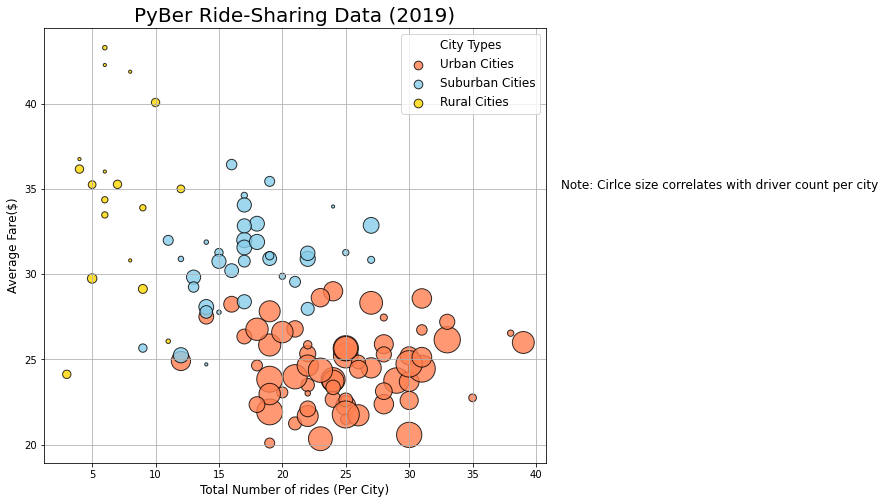

In [28]:
#Create bubble plot and save the figure in analysis folder
plt.subplots(figsize=(9,8))
plt.scatter(urbanRideCount,urbanFareMean,s=10*urbanDriversMean,color='coral',label='Urban Cities',edgecolor='black',linewidths=1,alpha=0.8)
plt.scatter(suburbRideCount, suburbFareMean,s=10*suburbDriversMean,color='skyblue',label='Suburban Cities',edgecolor='black',linewidths=1,alpha=0.8)
plt.scatter(ruralRideCount,ruralFareMean,s=10*ruralDriversMean,color='gold',label='Rural Cities',edgecolor='black',linewidths=1,alpha=0.8)
plt.title('PyBer Ride-Sharing Data (2019)', fontsize = 20)
plt.xlabel('Total Number of rides (Per City)', fontsize = 12)
plt.ylabel('Average Fare($)', fontsize = 12)
plt.grid(True)
lgnd = plt.legend(fontsize='12',mode='Expanded', scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)
plt.text(42,35, 'Note: Cirlce size correlates with driver count per city', fontsize='12')
plt.savefig('analysis/Fig1.png')
plt.show()


In [29]:
urbanCitiesDf.describe()
suburbCitiesDf.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [30]:
suburbRideCount.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [31]:
ruralRideCount.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [32]:
#calculate the mean ride count of each city type
round(urbanRideCount.mean(),2), round(suburbRideCount.mean(),2), round(ruralRideCount.mean(),2)

(24.62, 17.36, 6.94)

In [33]:
urbanRideCount.median(),suburbRideCount.median(),ruralRideCount.median()

(24.0, 17.0, 6.0)

In [34]:
urbanRideCount.mode(),suburbRideCount.mode(),ruralRideCount.mode()

(0    22
 1    25
 Name: ride_id, dtype: int64,
 0    17
 Name: ride_id, dtype: int64,
 0    6
 Name: ride_id, dtype: int64)

In [35]:
meanUrbanRideCount = np.mean(urbanRideCount)
meanUrbanRideCount

24.62121212121212

In [36]:
modeUrbanRideCount = sts.mode(urbanRideCount)
modeUrbanRideCount

ModeResult(mode=array([22]), count=array([7]))

In [37]:
modeSuburbRideCount = sts.mode(suburbRideCount)
modeSuburbRideCount

ModeResult(mode=array([17]), count=array([7]))

In [38]:
modeRuralRideCount = sts.mode(ruralRideCount)
modeRuralRideCount

ModeResult(mode=array([6]), count=array([5]))

In [39]:
urbanFares = urbanCitiesDf['fare']
urbanFares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [40]:
meanUrbanFares = np.mean(urbanFares)
medianUrbanFares = np.median(urbanFares)
modeUrbanFares = sts.mode(urbanFares)
meanUrbanFares, medianUrbanFares, modeUrbanFares

(24.52577230769236, 24.64, ModeResult(mode=array([22.86]), count=array([5])))

In [41]:
suburbFares = suburbCitiesDf['fare']
suburbFares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [42]:
meanSuburbFares = np.mean(suburbFares)
medianSuburbFares = np.mean(suburbFares)
modeSuburbFares = sts.mode(suburbFares)
meanSuburbFares, medianSuburbFares, modeSuburbFares

(30.97012800000002,
 30.97012800000002,
 ModeResult(mode=array([17.99]), count=array([3])))

In [43]:
ruralFares = ruralCitiesDf['fare']
ruralFares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [44]:
meanRuralFares = np.mean(ruralFares)
medianRuralFares = np.mean(ruralFares)
modeRuralFares = sts.mode(ruralFares)
meanRuralFares, medianRuralFares, modeRuralFares

(34.623440000000016,
 34.623440000000016,
 ModeResult(mode=array([37.05]), count=array([2])))

In [45]:
urbanDrivers = urbanCitiesDf['driver_count']
urbanDrivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [46]:
meanUrbanDrivers = np.mean(urbanDrivers)
medianUrbanDrivers = np.median(urbanDrivers)
modeUrbanDrivers = sts.mode(urbanDrivers)
meanUrbanDrivers, medianUrbanDrivers, modeUrbanDrivers

(36.67815384615385, 37.0, ModeResult(mode=array([39]), count=array([86])))

In [47]:
suburbDrivers = suburbCitiesDf['driver_count']
suburbDrivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [48]:
meanSuburbDrivers = np.mean(suburbDrivers)
medianSuburbDrivers = np.median(suburbDrivers)
modeSuburbDrivers = sts.mode(suburbDrivers)
meanSuburbDrivers, medianSuburbDrivers, modeSuburbDrivers

(13.712, 16.0, ModeResult(mode=array([20]), count=array([79])))

In [49]:
ruralDrivers = ruralCitiesDf['driver_count']
ruralDrivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [50]:
meanRuralDrivers = np.mean(ruralDrivers)
medianRuralDrivers = np.median(ruralDrivers)
modeRuralDrivers = sts.mode(ruralDrivers)
meanRuralDrivers, medianRuralDrivers, modeRuralDrivers

(4.296, 4.0, ModeResult(mode=array([1]), count=array([32])))

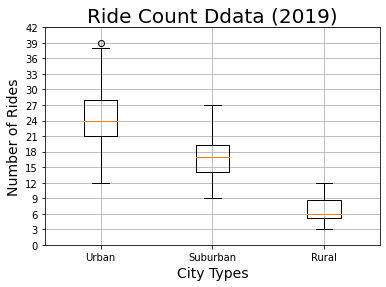

In [51]:
x_labels = ['Urban','Suburban','Rural']
rideCountData = [urbanRideCount,suburbRideCount,ruralRideCount]
fig,ax = plt.subplots()
ax.boxplot(rideCountData,labels=x_labels)
ax.set_title('Ride Count Ddata (2019)', fontsize = 20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types',fontsize = 14)
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()
plt.savefig('analysis/fig2.png')
plt.show()

In [52]:
urbanCityOutlier = urbanRideCount[urbanRideCount == 39].index[0]
print(f'{urbanCityOutlier} has the highest rider count')

West Angela has the highest rider count


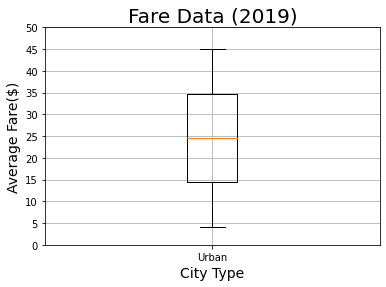

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [53]:
x_labels = ['Urban']
fareCountData = [urbanFares]
fig,ax = plt.subplots()
ax.boxplot(fareCountData, labels=x_labels)
ax.set_title('Fare Data (2019)', fontsize=20)
ax.set_ylabel('Average Fare($)', fontsize=14)
ax.set_xlabel('City Type',fontsize=14)
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
urbanFares.describe()

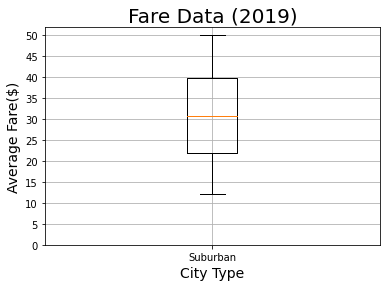

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [54]:
x_labels = ['Suburban']
fareCountData = [suburbFares]
fig,ax = plt.subplots()
ax.boxplot(fareCountData, labels=x_labels)
ax.set_title('Fare Data (2019)', fontsize=20)
ax.set_ylabel('Average Fare($)', fontsize=14)
ax.set_xlabel('City Type',fontsize=14)
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
suburbFares.describe()

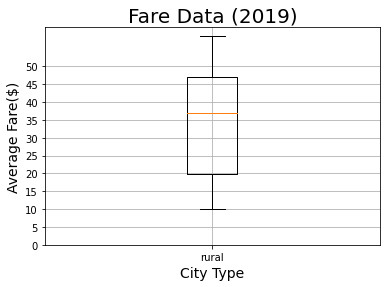

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [55]:
x_labels = ['rural']
fareCountData = [ruralFares]
fig,ax = plt.subplots()
ax.boxplot(fareCountData, labels=x_labels)
ax.set_title('Fare Data (2019)', fontsize=20)
ax.set_ylabel('Average Fare($)', fontsize=14)
ax.set_xlabel('City Type',fontsize=14)
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
ruralFares.describe()

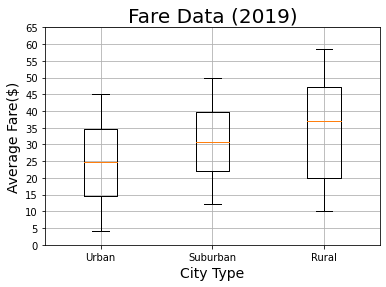

In [56]:
x_labels = ['Urban','Suburban','Rural']
fareCountData = [urbanFares,suburbFares,ruralFares]
fig,ax = plt.subplots()
ax.boxplot(fareCountData, labels=x_labels)
ax.set_title('Fare Data (2019)', fontsize=20)
ax.set_ylabel('Average Fare($)', fontsize=14)
ax.set_xlabel('City Type',fontsize=14)
ax.set_yticks(np.arange(0,70,step=5.0))
ax.grid()
plt.savefig('analysis/Fig3.png')
plt.show()
#print('Summary Statistics')
#urbanFares.describe(), suburbFares.describe(),ruralFares.describe()

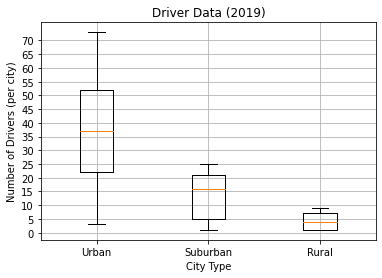

In [57]:
x_labels = ['Urban','Suburban','Rural']
driverData = [urbanDrivers,suburbDrivers,ruralDrivers]
fig,ax = plt.subplots()
ax.boxplot(driverData,labels=x_labels)
ax.set_title('Driver Data (2019)')
ax.set_ylabel('Number of Drivers (per city)')
ax.set_xlabel('City Type')
ax.set_yticks(np.arange(0,75,step=5.0))
ax.grid()
plt.savefig('analysis/Fig4.png')
plt.show()

In [58]:
sumFaresByType = pyBerDataComplete.groupby(['type']).sum()['fare']
sumFaresByType

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [59]:
totalFares = pyBerDataComplete['fare'].sum()
totalFares

63538.64

In [60]:
cityTypePct = 100 * (sumFaresByType / totalFares)
cityTypePct

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

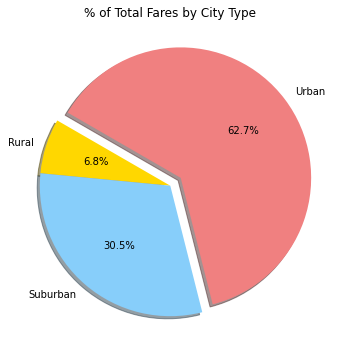

In [61]:
# Fares by City Type pie Chart
plt.subplots(figsize=(10,6))
plt.pie(cityTypePct, 
        labels=['Rural', 'Suburban','Urban'], 
        colors = ['gold','lightskyblue','lightcoral'],
        explode = [0,0,0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title('% of Total Fares by City Type')
mpl.rcParams['font.size']=14
plt.savefig('analysis/Fig5.png')
plt.show()

In [62]:
totalDrivers = pyBerDataComplete['driver_count'].sum()
totalDrivers

68709

In [63]:
totalCityTypeDrivers = pyBerDataComplete.groupby(['type']).sum()['driver_count']
totalCityTypeDrivers

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [64]:
cityTypeDriversPct = (totalCityTypeDrivers / totalDrivers) * 100
cityTypeDriversPct

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

In [65]:
driverPcts = 100* (pyBerDataComplete.groupby(['type']).sum()['driver_count'] / pyBerDataComplete['driver_count'].sum())
driverPcts



type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

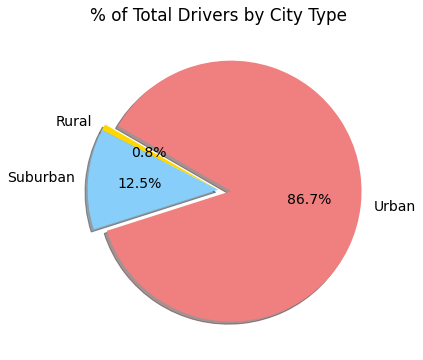

In [66]:
# Drivers by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(cityTypeDriversPct, 
        labels=['Rural', 'Suburban','Urban'], 
        colors = ['gold','lightskyblue','lightcoral'],
        explode = [0,0,0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title('% of Total Drivers by City Type')
mpl.rcParams['font.size']=14
plt.savefig('analysis/Fig7.png')
plt.show()

In [67]:
totalRides = pyBerDataComplete['ride_id'].count()
totalRides

2375

In [68]:
totalRidesCityType = pyBerDataComplete.groupby(['type']).count()['ride_id']
totalRidesCityType

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [69]:
ridesCityTypePct = (totalRidesCityType / totalRides) * 100
ridesCityTypePct

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

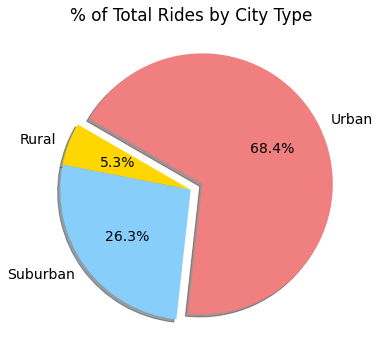

In [70]:
# Rides by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(ridesCityTypePct, 
        labels=['Rural', 'Suburban','Urban'], 
        colors = ['gold','lightskyblue','lightcoral'],
        explode = [0,0,0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title('% of Total Rides by City Type')
mpl.rcParams['font.size']=14
plt.savefig('analysis/Fig6.png')
plt.show()

In [71]:
avgFarePerRide = sumFaresByType / totalRidesCityType
avgFarePerRide

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [72]:
driverByCity = cityDataDf.groupby(['type']).sum()['driver_count']
driverByCity

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [73]:
sumFaresType = pyBerDataComplete.groupby(['type']).sum()['fare']
sumFaresType

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [74]:
avgFarePerDriver = sumFaresType/ driverByCity
avgFarePerDriver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [75]:
aggDataDf = pd.DataFrame({'Total Rides': totalRidesCityType, 
                         'Total Drivers': driverByCity, 
                         'Total Fares': sumFaresByType,
                         'Avg Fare Per Ride': avgFarePerRide,
                         'Avg Fare Per Driver': avgFarePerDriver})
aggDataDf

,Total Rides,Total Drivers,Total Fares,Avg Fare Per Ride,Avg Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [76]:
aggDataDf['Total Rides']=aggDataDf['Total Rides'].map('{:,}'.format)
aggDataDf['Total Drivers']=aggDataDf['Total Drivers'].map('{:,}'.format)
aggDataDf['Total Fares'] = aggDataDf['Total Fares'].map('${:,}'.format)
aggDataDf['Avg Fare Per Ride']= aggDataDf['Avg Fare Per Ride'].map('${:.2f}'.format)
aggDataDf['Avg Fare Per Driver']=aggDataDf['Avg Fare Per Driver'].map('${:.2f}'.format)
aggDataDf

,Total Rides,Total Drivers,Total Fares,Avg Fare Per Ride,Avg Fare Per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [77]:
dateAndTypeDf = pyBerDataComplete.groupby(['date','type']).sum()['fare']
dateAndTypeDf.head()

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
Name: fare, dtype: float64

In [78]:
dateAndTypeDf = dateAndTypeDf.reset_index()
dateAndTypeDf.head()

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75


In [79]:
dateAndTypeDf = dateAndTypeDf.pivot(index='date',columns='type',values='fare')
dateAndTypeDf.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [80]:
dateAndTypeDf1Q2019 = dateAndTypeDf.loc['2019-01-01':'2019-04-28']
dateAndTypeDf1Q2019.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [81]:
dateAndTypeDf1Q2019.index = pd.to_datetime(dateAndTypeDf1Q2019.index)
dateAndTypeDf1Q2019

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [82]:
dateAndTypeDf1Q2019.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [83]:
weeklyDateAndTypeDf1Q2019 = dateAndTypeDf1Q2019.resample('W').sum()
weeklyDateAndTypeDf1Q2019.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


In [84]:
ruralFaresDateTime = weeklyDateAndTypeDf1Q2019.groupby(['date']).sum()['Rural']
ruralFaresDateTime

date
2019-01-06    187.92
2019-01-13     67.65
2019-01-20    306.00
2019-01-27    179.69
2019-02-03    333.08
2019-02-10    115.80
2019-02-17     95.82
2019-02-24    419.06
2019-03-03    175.14
2019-03-10    303.94
2019-03-17    163.39
2019-03-24    189.76
2019-03-31    199.42
2019-04-07    501.24
2019-04-14    269.79
2019-04-21    214.14
2019-04-28    191.85
Freq: W-SUN, Name: Rural, dtype: float64

In [85]:
suburbFaresDateTime = weeklyDateAndTypeDf1Q2019.groupby(['date']).sum()['Suburban']
suburbFaresDateTime

date
2019-01-06     721.60
2019-01-13    1105.13
2019-01-20    1218.20
2019-01-27    1203.28
2019-02-03    1042.79
2019-02-10     974.34
2019-02-17    1045.50
2019-02-24    1412.74
2019-03-03     858.46
2019-03-10     925.27
2019-03-17     906.20
2019-03-24    1122.20
2019-03-31    1045.06
2019-04-07    1010.73
2019-04-14     784.82
2019-04-21    1149.27
2019-04-28    1169.04
Freq: W-SUN, Name: Suburban, dtype: float64

In [86]:
urbanFaresDateTime = weeklyDateAndTypeDf1Q2019.groupby(['date']).sum()['Urban']
urbanFaresDateTime

date
2019-01-06    1661.68
2019-01-13    2050.43
2019-01-20    1939.02
2019-01-27    2129.51
2019-02-03    2086.94
2019-02-10    2162.64
2019-02-17    2235.07
2019-02-24    2466.29
2019-03-03    2218.20
2019-03-10    2470.93
2019-03-17    2044.42
2019-03-24    2368.37
2019-03-31    1942.77
2019-04-07    2356.70
2019-04-14    2390.72
2019-04-21    2303.80
2019-04-28    1909.51
Freq: W-SUN, Name: Urban, dtype: float64

In [87]:
dates=[] 
for date in weeklyDateAndTypeDf1Q2019.index:
    dates.append(date)

dates

[Timestamp('2019-01-06 00:00:00', freq='W-SUN'),
 Timestamp('2019-01-13 00:00:00', freq='W-SUN'),
 Timestamp('2019-01-20 00:00:00', freq='W-SUN'),
 Timestamp('2019-01-27 00:00:00', freq='W-SUN'),
 Timestamp('2019-02-03 00:00:00', freq='W-SUN'),
 Timestamp('2019-02-10 00:00:00', freq='W-SUN'),
 Timestamp('2019-02-17 00:00:00', freq='W-SUN'),
 Timestamp('2019-02-24 00:00:00', freq='W-SUN'),
 Timestamp('2019-03-03 00:00:00', freq='W-SUN'),
 Timestamp('2019-03-10 00:00:00', freq='W-SUN'),
 Timestamp('2019-03-17 00:00:00', freq='W-SUN'),
 Timestamp('2019-03-24 00:00:00', freq='W-SUN'),
 Timestamp('2019-03-31 00:00:00', freq='W-SUN'),
 Timestamp('2019-04-07 00:00:00', freq='W-SUN'),
 Timestamp('2019-04-14 00:00:00', freq='W-SUN'),
 Timestamp('2019-04-21 00:00:00', freq='W-SUN'),
 Timestamp('2019-04-28 00:00:00', freq='W-SUN')]

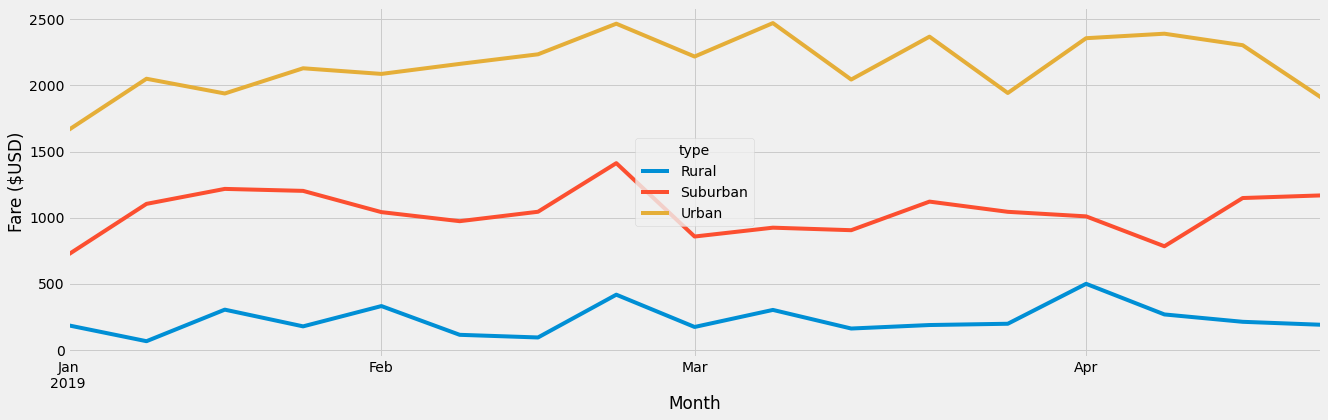

In [89]:
style.use('fivethirtyeight')
fareData = weeklyDateAndTypeDf1Q2019.plot(figsize=(20,6))
fareData.set_xlabel('Month')
fareData.set_ylabel('Fare ($USD)')
plt.savefig('analysis/challenge_fare_summary.png')

plt.show()